# Real-world Data Wrangling

In this project, you will apply the skills you acquired in the course to gather and wrangle real-world data with two datasets of your choice.

You will retrieve and extract the data, assess the data programmatically and visually, accross elements of data quality and structure, and implement a cleaning strategy for the data. You will then store the updated data into your selected database/data store, combine the data, and answer a research question with the datasets.

Throughout the process, you are expected to:

1. Explain your decisions towards methods used for gathering, assessing, cleaning, storing, and answering the research question
2. Write code comments so your code is more readable

Before you start, install the some of the required packages. 

In [157]:
!python -m pip install kaggle==1.6.12

In [158]:
import os 
import shutil

In [159]:
#Defined path for kaggle directory
kaggle_dir =os.path.expanduser('~/.kaggle')
#Create directory
os.makedirs(kaggle_dir, exist_ok=True)

In [160]:
#Move the kaggle.json file to the directory. updating the source path.
source_path = '/Users/leonardoflores/Downloads/kaggle.json'
destination_path = os.path.join(kaggle_dir, 'kaggle.json')

In [161]:
#Copying the kaggle.json to destination
shutil.copy(source_path, destination_path)

'/Users/leonardoflores/.kaggle/kaggle.json'

In [162]:
# Change permission to secure the file
os.chmod(destination_path, 0o600)

In [163]:
# Verify that the API worked
!kaggle datasets list

ref                                                           title                                            size  lastUpdated          downloadCount  voteCount  usabilityRating  
------------------------------------------------------------  ----------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
muhammadroshaanriaz/students-performance-dataset-cleaned      Students Performance | Clean Dataset             10KB  2024-10-29 19:32:26           9803        179  1.0              
ikynahidwin/depression-professional-dataset                   Depression Professional Dataset                  16KB  2024-11-20 06:39:18           1121         26  1.0              
steve1215rogg/student-lifestyle-dataset                       student lifestyle dataset                        22KB  2024-11-11 19:11:28           4608         68  1.0              
ikynahidwin/depression-student-dataset                        Depression Student Dataset  

In [164]:
import pandas as pd
import json

## 1. Gather data

In this section, you will extract data using two different data gathering methods and combine the data. Use at least two different types of data-gathering methods.

### **1.1.** Problem Statement
In 2-4 sentences, explain the kind of problem you want to look at and the datasets you will be wrangling for this project.

- What are the movies in english that generated the most revenue in the past 10 years (2014 and onward)? 
- How much has action movies generated in revenue in the past 10 years (2014 and onward)?

### **1.2.** Gather at least two datasets using two different data gathering methods

List of data gathering methods:

- Download data manually
- Programmatically downloading files
- Gather data by accessing APIs
- Gather and extract data from HTML files using BeautifulSoup
- Extract data from a SQL database

Each dataset must have at least two variables, and have greater than 500 data samples within each dataset.

For each dataset, briefly describe why you picked the dataset and the gathering method (2-3 full sentences), including the names and significance of the variables in the dataset. Show your work (e.g., if using an API to download the data, please include a snippet of your code). 

Load the dataset programmtically into this notebook.

#### **Dataset 1**

Type: CSV file

Method: The data was gathered using the "API" method from "Kaggle.com" source.

Dataset variables:

*   Movie ID (Unique Identifier)
*   Title

In [600]:
! kaggle datasets list -s 'TMDB'

ref                                                      title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
-------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
tmdb/tmdb-movie-metadata                                 TMDB 5000 Movie Dataset                               9MB  2017-09-28 01:09:12         395960       3883  0.8235294        
asaniczka/tmdb-movies-dataset-2023-930k-movies           Full TMDB Movies Dataset 2024 (1M Movies)           204MB  2024-12-07 11:51:12          14125        428  1.0              
juzershakir/tmdb-movies-dataset                          TMDb Movies Dataset                                   3MB  2018-03-24 04:18:19           6320         55  0.7058824        
ahsanaseer/top-rated-tmdb-movies-10k                     TMDB Movies Dataset                   

In [601]:
!kaggle datasets download -d 'tmdb/tmdb-movie-metadata'

Dataset URL: https://www.kaggle.com/datasets/tmdb/tmdb-movie-metadata
License(s): other
tmdb-movie-metadata.zip: Skipping, found more recently modified local copy (use --force to force download)


In [602]:
import zipfile
with zipfile.ZipFile('tmdb-movie-metadata.zip','r') as zip_ref:
    zip_ref.extractall('/Users/leonardoflores/Desktop/Project two')

In [603]:
#List all files and subdirectories
location = '/Users/leonardoflores/Desktop/Project two'
unzipped_files =os.listdir(location)
for file in unzipped_files:
    print(file)
    

.DS_Store
data_wrangling_project_starter (1).ipynb
tmdb_cleaned_movies.csv
tmdb_raw_credits.csv
tmdb_combined.csv
tmdb_5000_credits.csv
tmdb_5000_movies.csv
tmdb_raw_movies.csv
tmdb-movie-metadata.zip
.ipynb_checkpoints
tmdb_cleaned_credits.csv


In [604]:
dataframe_one = pd.read_csv('tmdb_5000_credits.csv')
dataframe_one.set_index('movie_id',inplace=True)
dataframe_one.head(10)

title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   
559                                   Spider-Man 3   
38757                                      Tangled   
99861                      Avengers: Age of Ultron   
767         Harry Potter and the Half-Blood Prince   
209112          Batman v Superman: Dawn of Justice   

                                                       cast  \
movie_id                                                      
19995     [{"cast_id": 242, "character": "Jake Sully", "...   
285       [{"cast_id": 4, "character": "Captain Jack Spa...   
206647    [{"cast_id": 1, "character": "James Bond", "cr...   
49026     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
49529     [{"cast_id": 5, "character": "John Carter", "c...   
559       [{"cast_id": 30, "character": "Peter Parker / ...   
38757     [{"cast_id": 34, "character": "Flynn Rider (vo...   
99861     [{"cast_id": 76, "character": "Tony Stark / Ir...   
767       [{"cast_id": 3, "character": "Harry Potter", "...   
209112    [{"cast_id": 18, "character": "Bruce Wayne / B...   

                                                       crew  
movie_id                                                     
19995     [{"credit_id": "52fe48009251416c750aca23", "de...  
285       [{"credit_id": "52fe4232c3a36847f800b579", "de...  
206647    [{"credit_id": "54805967c3a36829b5002c41", "de...  
49026     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
49529     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
559       [{"credit_id": "52fe4252c3a36847f80151a5", "de...  
38757     [{"credit_id": "52fe46db9251416c91062101", "de...  
99861     [{"credit_id": "55d5f7d4c3a3683e7e0016eb", "de...  
767       [{"credit_id": "52fe4273c3a36847f801fab1", "de...  
209112    [{"credit_id": "553bf23692514135c8002886", "de...

In [605]:
dataframe_one.shape

(4803, 3)

#### Dataset 2

Type: CSV File.

Method: The data was gathered using the "Downloading files" manually method from "Kaggle.com". 


Dataset variables:

*   Revenue (US Currency)
*   Release date

In [606]:
#FILL IN 2nd data gathering and loading method
dataframe_two = pd.read_csv('tmdb_5000_movies.csv')
dataframe_two.rename(columns ={'id':'movie_id'}, inplace=True)
dataframe_two.set_index('movie_id',inplace=True)
dataframe_two.head(10)


budget                                             genres  \
movie_id                                                                 
19995     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285       300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
206647    245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
49026     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
559       258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
38757     260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
99861     280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
767       250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
209112    250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                                   homepage  \
movie_id                                                      
19995                           http://www.avatarmovie.com/   
285            http://disney.go.com/disneypictures/pirates/   
206647          http://www.sonypictures.com/movies/spectre/   
49026                    http://www.thedarkknightrises.com/   
49529                  http://movies.disney.com/john-carter   
559         http://www.sonypictures.com/movies/spider-man3/   
38757          http://disney.go.com/disneypictures/tangled/   
99861     http://marvel.com/movies/movie/193/avengers_ag...   
767       http://harrypotter.warnerbros.com/harrypottera...   
209112         http://www.batmanvsupermandawnofjustice.com/   

                                                   keywords original_language  \
movie_id                                                                        
19995     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
285       [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
206647    [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
49026     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
49529     [{"id": 818, "name": "based on novel"}, {"id":...                en   
559       [{"id": 851, "name": "dual identity"}, {"id": ...                en   
38757     [{"id": 1562, "name": "hostage"}, {"id": 2343,...                en   
99861     [{"id": 8828, "name": "marvel comic"}, {"id": ...                en   
767       [{"id": 616, "name": "witch"}, {"id": 2343, "n...                en   
209112    [{"id": 849, "name": "dc comics"}, {"id": 7002...                en   

                                    original_title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   
559                                   Spider-Man 3   
38757                                      Tangled   
99861                      Avengers: Age of Ultron   
767         Harry Potter and the Half-Blood Prince   
209112          Batman v Superman: Dawn of Justice   

                                                   overview  popularity  \
movie_id                                                                  
19995     In the 22nd century, a paraplegic Marine is di...  150.437577   
285       Captain Barbossa, long believed to be dead, ha...  139.082615   
206647    A cryptic message from Bond’s past sends him o...  107.376788   
49026     Following the death of District Attorney Harve...  112.312950   
49529     John Carter is a war-weary, former military ca...   43.926995   
559       The seemingly invincible Spider-Man goes up ag...  115.699814   
38757     When the kingdom's most wanted-and most charmi...   48.681969   
99861     When Tony Stark tries to jumpstart a dormant p...  134.27922

In [607]:
dataframe_two.shape

(4803, 19)

Optional data storing step: You may save your raw dataset files to the local data store before moving to the next step.

In [608]:
#Optional: store the raw data in your local data store

## 2. Assess data

Assess the data according to data quality and tidiness metrics using the report below.

List **two** data quality issues and **two** tidiness issues. Assess each data issue visually **and** programmatically, then briefly describe the issue you find.  **Make sure you include justifications for the methods you use for the assessment.**

### Quality Issue 1:

In [368]:
#FILL IN - Inspecting the dataframe visually
dataframe_one.head(10)

title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   
559                                   Spider-Man 3   
38757                                      Tangled   
99861                      Avengers: Age of Ultron   
767         Harry Potter and the Half-Blood Prince   
209112          Batman v Superman: Dawn of Justice   

                                                       cast  \
movie_id                                                      
19995     [{"cast_id": 242, "character": "Jake Sully", "...   
285       [{"cast_id": 4, "character": "Captain Jack Spa...   
206647    [{"cast_id": 1, "character": "James Bond", "cr...   
49026     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
49529     [{"cast_id": 5, "character": "John Carter", "c...   
559       [{"cast_id": 30, "character": "Peter Parker / ...   
38757     [{"cast_id": 34, "character": "Flynn Rider (vo...   
99861     [{"cast_id": 76, "character": "Tony Stark / Ir...   
767       [{"cast_id": 3, "character": "Harry Potter", "...   
209112    [{"cast_id": 18, "character": "Bruce Wayne / B...   

                                                       crew  
movie_id                                                     
19995     [{"credit_id": "52fe48009251416c750aca23", "de...  
285       [{"credit_id": "52fe4232c3a36847f800b579", "de...  
206647    [{"credit_id": "54805967c3a36829b5002c41", "de...  
49026     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
49529     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...  
559       [{"credit_id": "52fe4252c3a36847f80151a5", "de...  
38757     [{"credit_id": "52fe46db9251416c91062101", "de...  
99861     [{"credit_id": "55d5f7d4c3a3683e7e0016eb", "de...  
767       [{"credit_id": "52fe4273c3a36847f801fab1", "de...  
209112    [{"credit_id": "553bf23692514135c8002886", "de...

In [369]:
#FILL IN - Inspecting the dataframe programmatically
dataframe_one.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 19995 to 25975
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   title   4803 non-null   object
 1   cast    4803 non-null   object
 2   crew    4803 non-null   object
dtypes: object(3)
memory usage: 279.1+ KB


In [370]:
dataframe_one.isnull().sum()

title    0
cast     0
crew     0
dtype: int64

In [371]:
sum(dataframe_one.duplicated())

0

Issue and justification: 

Columns 'cast' and 'crew' contain JSON-like strings , which contains nested data. Within the nested data appear to contain important data such as "cast_id" and "credit_id". These columns although contain dense information of other aspects of the movies does not answer the problem in question. Therefore, it needs to be decided in the next phase if these columns be kept of dropped.

### Quality Issue 2:

In [372]:
#FILL IN - Inspecting the dataframe visually
dataframe_two.sample(10)

budget                                             genres  \
movie_id                                                                
9440      65000000  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
214756    68000000                     [{"id": 35, "name": "Comedy"}]   
193722     5500000  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
9647             0  [{"id": 14, "name": "Fantasy"}, {"id": 35, "na...   
73567     10000000  [{"id": 80, "name": "Crime"}, {"id": 18, "name...   
355629           0  [{"id": 18, "name": "Drama"}, {"id": 35, "name...   
266102           0                      [{"id": 18, "name": "Drama"}]   
9429      17000000                     [{"id": 35, "name": "Comedy"}]   
10316     12500000                      [{"id": 18, "name": "Drama"}]   
69640            0  [{"id": 18, "name": "Drama"}, {"id": 9648, "na...   

                                                   homepage  \
movie_id                                                      
9440                                                    NaN   
214756                                                  NaN   
193722                                http://www.r-100.com/   
9647                                                    NaN   
73567                         http://killerjoethemovie.com/   
355629                                                  NaN   
266102                                                  NaN   
9429                                                    NaN   
10316     http://www.sonypictures.com/movies/theidesofma...   
69640                                                   NaN   

                                                   keywords original_language  \
movie_id                                                                        
9440      [{"id": 833, "name": "white house"}, {"id": 84...                en   
214756    [{"id": 5098, "name": "sperm bank"}, {"id": 96...                en   
193722    [{"id": 7089, "name": "dominatrix"}, {"id": 15...                ja   
9647      [{"id": 65, "name": "holiday"}, {"id": 7271, "...                en   
73567     [{"id": 900, "name": "trailer park"}, {"id": 1...                en   
355629                       [{"id": 5967, "name": "peru"}]                en   
266102    [{"id": 1691, "name": "dance"}, {"id": 4051, "...                en   
9429      [{"id": 1759, "name": "night life"}, {"id": 23...                en   
10316     [{"id": 2494, "name": "ohio"}, {"id": 6078, "n...                en   
69640     [{"id": 236, "name": "suicide"}, {"id": 6625, ...                en   

                  original_title  \
movie_id                           
9440              Primary Colors   
214756                     Ted 2   
193722                      R100   
9647                    Scrooged   
73567                 Killer Joe   
355629     La Navaja De Don Juan   
266102             Desert Dancer   
9429      A Night at the Roxbury   
10316          The Ides of March   
69640        Lies in Plain Sight   

                                                   overview  popularity  \
movie_id                                                                  
9440      In this adaptation of the best-selling roman à...    9.110247   
214756    Newlywed couple Ted and Tami-Lynn want to have...   68.734513   
193722    Ruthless dominatrixes pursue a mild-mannered s...    3.213920   
9647      In this modern take on Charles Dickens' "A Chr...   21.620317   
73567     A cop (Matthew McConaughey) who moonlights as ...   16.436178   
355629    The fate of an arm-wrestling match leads two r...    0.021678   
266102    Inspirational true story of Iranian dancer Afs...    1.972668   
9429      Despite being well into adulthood, brothers Do...   12.709227   
10316     Dirty tricks stand to soil an ambitious young ...   20.317469   
69640     “Lies in Plain Sight” tells the story of Eva a...    0.479090   

                                       production_companies  \
movie_id

In [373]:
#FILL IN - Inspecting the dataframe programmatically
dataframe_two.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4803 entries, 19995 to 25975
Data columns (total 19 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   budget                4803 non-null   int64  
 1   genres                4803 non-null   object 
 2   homepage              1712 non-null   object 
 3   keywords              4803 non-null   object 
 4   original_language     4803 non-null   object 
 5   original_title        4803 non-null   object 
 6   overview              4800 non-null   object 
 7   popularity            4803 non-null   float64
 8   production_companies  4803 non-null   object 
 9   production_countries  4803 non-null   object 
 10  release_date          4802 non-null   object 
 11  revenue               4803 non-null   int64  
 12  runtime               4801 non-null   float64
 13  spoken_languages      4803 non-null   object 
 14  status                4803 non-null   object 
 15  tagline         

In [374]:
dataframe_two.isnull().sum()

budget                     0
genres                     0
homepage                3091
keywords                   0
original_language          0
original_title             0
overview                   3
popularity                 0
production_companies       0
production_countries       0
release_date               1
revenue                    0
runtime                    2
spoken_languages           0
status                     0
tagline                  844
title                      0
vote_average               0
vote_count                 0
dtype: int64

In [375]:
sum(dataframe_two.duplicated())

0

Issue and justification: 

Columns like 'genres' and 'production_companies' contain JSON-like strings, in other words they contain nested data. Pasing the columns with JSON values will deepen the understanding of our dataset. Without parsing, the data will have inconsistent data format which not allow the ability to have structured data. 

The column 'release_date' has a date type of object. This columns needs to be converted into a datetime datatype instead. This will allows us to do analysis if our data in the later phases.

The 'homepage' and 'tagline' columns had a large amount of missing values.  Additional columns 'overview' and 'runtime' only has a few missing values. These data gaps might affect our analysis later down in the visualization process. It would probably be best to drop 'homepage', 'tagline' and any other columns that is not relevent to the question that we want to answer.   


### Tidiness Issue 1:

In [376]:
#FILL IN - Inspecting the dataframe visually
dataframe_one[dataframe_one['cast'].duplicated(keep=False)]

title cast  \
movie_id                                                           
17644                              Barney's Great Adventure   []   
447027                                      Running Forever   []   
346081                                            Sardaarji   []   
126509                                2016: Obama's America   []   
371085                                            Sharkskin   []   
325140                               Hum To Mohabbat Karega   []   
361505                                Me You and Five Bucks   []   
114065                            Down & Out With The Dolls   []   
137955                                            Crowsnest   []   
102840                                   Sex With Strangers   []   
43630                                   The Helix... Loaded   []   
292539                                          Food Chains   []   
279759                                  Harrison Montgomery   []   
296943                        The Hadza:  Last of the First   []   
331493                              Light from the Darkroom   []   
70875                              The Harvest (La Cosecha)   []   
14358                                      Mad Hot Ballroom   []   
294550                         The Outrageous Sophie Tucker   []   
380097                           America Is Still the Place   []   
297100                             The Little Ponderosa Zoo   []   
94072                              Straight Out of Brooklyn   []   
325579                                         Diamond Ruff   []   
328307    Rise of the Entrepreneur: The Search for a Bet...   []   
281189                                 Gory Gory Hallelujah   []   
47546                                     I Want Your Money   []   
43743                                                Fabled   []   
87943                                        Sisters in Law   []   
73981                                Ayurveda: Art of Being   []   
300327                                          Death Calls   []   
378237                             Amidst the Devil's Wings   []   
320435                                            UnDivided   []   
194588                     Short Cut to Nirvana: Kumbh Mela   []   
287815                                      Call + Response   []   
126141                         The Case of the Grinning Cat   []   
37985                             The Trials Of Darryl Hunt   []   
253290                                       Butterfly Girl   []   
335244                            Antarctic Edge: 70° South   []   
331745                                             Top Spin   []   
38786     The Blood of My Brother: A Story of Death in Iraq   []   
64973                 Peace, Propaganda & the Promised Land   []   
322745                                             Counting   []   
174362                                        Bending Steel   []   
67238                                                Cavite   []   

                                                       crew  
movie_id                                                     
17644     [{"credit_id": "52fe473b9251416c750921ff", "de...  
447027                                                   []  
346081    [{"credit_id": "558ab3f4925141076f0001d7", "de...  
126509    [{"credit_id": "52fe4ae1c3a368484e16bcd7", "de...  
371085                                                   []  
325140                                                   []  
361505                                                   []  
114065                                                   []  
137955                                                   []  
102840                                                   []  
43630                                                    []  
292539    [{"credit_id": "5470c3b1c3a368085e000abd", "de...  
279759                                                   []  
296943    [{"credit_id": "54383e6fc3a36825ba001c52", "de...  
3

In [377]:
#FILL IN - Inspecting the dataframe visually
dataframe_one[dataframe_one['crew'].duplicated(keep=False)]

title  \
movie_id                                                      
19615                                             Flying By   
447027                                      Running Forever   
55831                                    Boynton Beach Club   
371085                                            Sharkskin   
48382       The Book of Mormon Movie, Volume 1: The Journey   
325140                               Hum To Mohabbat Karega   
20653                                        Roadside Romeo   
361505                                Me You and Five Bucks   
114065                            Down & Out With The Dolls   
137955                                            Crowsnest   
102840                                   Sex With Strangers   
43630                                   The Helix... Loaded   
357441                                    Karachi se Lahore   
279759                                  Harrison Montgomery   
331493                              Light from the Darkroom   
380097                           America Is Still the Place   
297100                             The Little Ponderosa Zoo   
325579                                         Diamond Ruff   
328307    Rise of the Entrepreneur: The Search for a Bet...   
47546                                     I Want Your Money   
43743                                                Fabled   
300327                                          Death Calls   
378237                             Amidst the Devil's Wings   
325123                                      Teeth and Blood   
320435                                            UnDivided   
40963                                        Little Big Top   
194588                     Short Cut to Nirvana: Kumbh Mela   
38786     The Blood of My Brother: A Story of Death in Iraq   

                                                       cast crew  
movie_id                                                          
19615     [{"cast_id": 1, "character": "George", "credit...   []  
447027                                                   []   []  
55831     [{"cast_id": 1, "character": "Marilyn", "credi...   []  
371085                                                   []   []  
48382     [{"cast_id": 1, "character": "Sam", "credit_id...   []  
325140                                                   []   []  
20653     [{"cast_id": 1, "character": "Romeo", "credit_...   []  
361505                                                   []   []  
114065                                                   []   []  
137955                                                   []   []  
102840                                                   []   []  
43630                                                    []   []  
357441    [{"cast_id": 0, "character": "", "credit_id": ...   []  
279759                                                   []   []  
331493                                                   []   []  
380097                                                   []   []  
297100                                                   []   []  
325579                                                   []   []  
328307                                                   []   []  
47546                                                    []   []  
43743                                                    []   []  
300327                                                   []   []  
378237                                                   []   []  
325123    [{"cast_id": 0, "character": "Vincent Augustin...   []  
320435                                                   []   []  
40963     [{"cast_id": 0, "character": "Seymour", "credi...   []  
194588                                                   []   []  
38786                                                    []   []

In [378]:
#FILL IN - Inspecting the dataframe programmatically
json.loads(dataframe_one['cast'].iloc[0])

[{'cast_id': 242,
  'character': 'Jake Sully',
  'credit_id': '5602a8a7c3a3685532001c9a',
  'gender': 2,
  'id': 65731,
  'name': 'Sam Worthington',
  'order': 0},
 {'cast_id': 3,
  'character': 'Neytiri',
  'credit_id': '52fe48009251416c750ac9cb',
  'gender': 1,
  'id': 8691,
  'name': 'Zoe Saldana',
  'order': 1},
 {'cast_id': 25,
  'character': 'Dr. Grace Augustine',
  'credit_id': '52fe48009251416c750aca39',
  'gender': 1,
  'id': 10205,
  'name': 'Sigourney Weaver',
  'order': 2},
 {'cast_id': 4,
  'character': 'Col. Quaritch',
  'credit_id': '52fe48009251416c750ac9cf',
  'gender': 2,
  'id': 32747,
  'name': 'Stephen Lang',
  'order': 3},
 {'cast_id': 5,
  'character': 'Trudy Chacon',
  'credit_id': '52fe48009251416c750ac9d3',
  'gender': 1,
  'id': 17647,
  'name': 'Michelle Rodriguez',
  'order': 4},
 {'cast_id': 8,
  'character': 'Selfridge',
  'credit_id': '52fe48009251416c750ac9e1',
  'gender': 2,
  'id': 1771,
  'name': 'Giovanni Ribisi',
  'order': 5},
 {'cast_id': 7,
  'c

In [379]:
#FILL IN - Inspecting the dataframe programmatically
json.loads(dataframe_one['crew'].iloc[0])

[{'credit_id': '52fe48009251416c750aca23',
  'department': 'Editing',
  'gender': 0,
  'id': 1721,
  'job': 'Editor',
  'name': 'Stephen E. Rivkin'},
 {'credit_id': '539c47ecc3a36810e3001f87',
  'department': 'Art',
  'gender': 2,
  'id': 496,
  'job': 'Production Design',
  'name': 'Rick Carter'},
 {'credit_id': '54491c89c3a3680fb4001cf7',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Sound Designer',
  'name': 'Christopher Boyes'},
 {'credit_id': '54491cb70e0a267480001bd0',
  'department': 'Sound',
  'gender': 0,
  'id': 900,
  'job': 'Supervising Sound Editor',
  'name': 'Christopher Boyes'},
 {'credit_id': '539c4a4cc3a36810c9002101',
  'department': 'Production',
  'gender': 1,
  'id': 1262,
  'job': 'Casting',
  'name': 'Mali Finn'},
 {'credit_id': '5544ee3b925141499f0008fc',
  'department': 'Sound',
  'gender': 2,
  'id': 1729,
  'job': 'Original Music Composer',
  'name': 'James Horner'},
 {'credit_id': '52fe48009251416c750ac9c3',
  'department': 'Directing',
  

In [380]:
dataframe_one.columns

Index(['title', 'cast', 'crew'], dtype='object')

Issue and justification: 

As described in this section of advanced data wrangling, there are three key principles that data structures should adhere too. These rules are each variable should have its own column, each observation should have its own row, and lastly each type of obervational unit should form a separate table.

With this in mind, once we properly parse through the JSON columns, we will have multiple observational units one table. This can create issues with our analysis of the data and the repeated 'movie_id' will introduce unwanted redundancy. We must seperate the tables into the 'movie' table and two additional tables for each column that has JSON values. In order words, an additional tables name 'cast' and 'crew'.   

### Tidiness Issue 2: 

In [381]:
#FILL IN - Inspecting the dataframe visually
dataframe_two[dataframe_two['production_companies'].duplicated(keep=False)]

budget                                             genres  \
movie_id                                                                 
285       300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
49529     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
559       258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
38757     260000000  [{"id": 16, "name": "Animation"}, {"id": 10751...   
767       250000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
...             ...                                                ...   
14337          7000  [{"id": 878, "name": "Science Fiction"}, {"id"...   
67238             0  [{"id": 10769, "name": "Foreign"}, {"id": 53, ...   
9367         220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
72766          9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
126186            0                                                 []   

                                                   homepage  \
movie_id                                                      
285            http://disney.go.com/disneypictures/pirates/   
49529                  http://movies.disney.com/john-carter   
559         http://www.sonypictures.com/movies/spider-man3/   
38757          http://disney.go.com/disneypictures/tangled/   
767       http://harrypotter.warnerbros.com/harrypottera...   
...                                                     ...   
14337                            http://www.primermovie.com   
67238                                                   NaN   
9367                                                    NaN   
72766                                                   NaN   
126186                          http://shanghaicalling.com/   

                                                   keywords original_language  \
movie_id                                                                        
285       [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
49529     [{"id": 818, "name": "based on novel"}, {"id":...                en   
559       [{"id": 851, "name": "dual identity"}, {"id": ...                en   
38757     [{"id": 1562, "name": "hostage"}, {"id": 2343,...                en   
767       [{"id": 616, "name": "witch"}, {"id": 2343, "n...                en   
...                                                     ...               ...   
14337     [{"id": 1448, "name": "distrust"}, {"id": 2101...                en   
67238                                                    []                en   
9367      [{"id": 5616, "name": "united states\u2013mexi...                es   
72766                                                    []                en   
126186                                                   []                en   

                                    original_title  \
movie_id                                             
285       Pirates of the Caribbean: At World's End   
49529                                  John Carter   
559                                   Spider-Man 3   
38757                                      Tangled   
767         Harry Potter and the Half-Blood Prince   
...                                            ...   
14337                                       Primer   
67238                                       Cavite   
9367                                   El Mariachi   
72766                                    Newlyweds   
126186                            Shanghai Calling   

                                                   overview  popularity  \
movie_id                                                                  
285       Captain Barbossa, long believed to be dead, ha...  139.082615   
49529     John Carter is a war-weary, former military ca...   43.926995   
559       The seemingly invincible Spider-Man goes up ag...  115.699814   
38757     When the kingdom's most wanted-and most charmi...   48.681969   
767       As Harry begi

In [382]:
#FILL IN - Inspecting the dataframe visually
dataframe_two[dataframe_two['spoken_languages'].duplicated(keep=False)]

budget                                             genres  \
movie_id                                                                 
19995     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285       300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
49026     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
559       258000000  [{"id": 14, "name": "Fantasy"}, {"id": 28, "na...   
...             ...                                                ...   
9367         220000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
72766          9000  [{"id": 35, "name": "Comedy"}, {"id": 10749, "...   
231617            0  [{"id": 35, "name": "Comedy"}, {"id": 18, "nam...   
126186            0                                                 []   
25975             0                [{"id": 99, "name": "Documentary"}]   

                                                   homepage  \
movie_id                                                      
19995                           http://www.avatarmovie.com/   
285            http://disney.go.com/disneypictures/pirates/   
49026                    http://www.thedarkknightrises.com/   
49529                  http://movies.disney.com/john-carter   
559         http://www.sonypictures.com/movies/spider-man3/   
...                                                     ...   
9367                                                    NaN   
72766                                                   NaN   
231617    http://www.hallmarkchannel.com/signedsealeddel...   
126186                          http://shanghaicalling.com/   
25975                                                   NaN   

                                                   keywords original_language  \
movie_id                                                                        
19995     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
285       [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
49026     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
49529     [{"id": 818, "name": "based on novel"}, {"id":...                en   
559       [{"id": 851, "name": "dual identity"}, {"id": ...                en   
...                                                     ...               ...   
9367      [{"id": 5616, "name": "united states\u2013mexi...                es   
72766                                                    []                en   
231617    [{"id": 248, "name": "date"}, {"id": 699, "nam...                en   
126186                                                   []                en   
25975     [{"id": 1523, "name": "obsession"}, {"id": 224...                en   

                                    original_title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
49026                        The Dark Knight Rises   
49529                                  John Carter   
559                                   Spider-Man 3   
...                                            ...   
9367                                   El Mariachi   
72766                                    Newlyweds   
231617                   Signed, Sealed, Delivered   
126186                            Shanghai Calling   
25975                            My Date with Drew   

                                                   overview  popularity  \
movie_id                                                                  
19995     In the 22nd century, a paraplegic Marine is di...  150.437577   
285       Captain Barbossa, long believed to be dead, ha...  139.082615   
49026     Following the death of District Attorney Harve...  112.312950   
49529     John Carter is a war-weary, former military ca...   43.926995   
559       The seemingly

In [383]:
#FILL IN - Inspecting the dataframe programmatically

json.loads(dataframe_two['production_companies'].iloc[0])

[{'name': 'Ingenious Film Partners', 'id': 289},
 {'name': 'Twentieth Century Fox Film Corporation', 'id': 306},
 {'name': 'Dune Entertainment', 'id': 444},
 {'name': 'Lightstorm Entertainment', 'id': 574}]

In [384]:
#FILL IN - Inspecting the dataframe programmatically
json.loads(dataframe_two['spoken_languages'].iloc[0])

[{'iso_639_1': 'en', 'name': 'English'},
 {'iso_639_1': 'es', 'name': 'Español'}]

In [385]:
dataframe_two.columns

Index(['budget', 'genres', 'homepage', 'keywords', 'original_language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'revenue', 'runtime',
       'spoken_languages', 'status', 'tagline', 'title', 'vote_average',
       'vote_count'],
      dtype='object')

Issue and justification: 

On 'production_companies' column each column should have its own column for analysis. Currently the column has nested structure which violates the tidiness priciple of 'one variable per column'. Therefore it needs to be properly parse through. On 'spoken_languages' column, we are able to see that multiple values are within a single cell. This creates issues for say if we want to filter our analysis through grouping of languages.

## 3. Clean data
Clean the data to solve the 4 issues corresponding to data quality and tidiness found in the assessing step. **Make sure you include justifications for your cleaning decisions.**

After the cleaning for each issue, please use **either** the visually or programatical method to validate the cleaning was succesful.

At this stage, you are also expected to remove variables that are unnecessary for your analysis and combine your datasets. Depending on your datasets, you may choose to perform variable combination and elimination before or after the cleaning stage. Your dataset must have **at least** 4 variables after combining the data.

In [660]:
# FILL IN - Make copies of the datasets to ensure the raw dataframes are not impacted
df1 = dataframe_one.copy()
df2 = dataframe_two.copy()

In [661]:
df1.head()

title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   

                                                       cast  \
movie_id                                                      
19995     [{"cast_id": 242, "character": "Jake Sully", "...   
285       [{"cast_id": 4, "character": "Captain Jack Spa...   
206647    [{"cast_id": 1, "character": "James Bond", "cr...   
49026     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
49529     [{"cast_id": 5, "character": "John Carter", "c...   

                                                       crew  
movie_id                                                     
19995     [{"credit_id": "52fe48009251416c750aca23", "de...  
285       [{"credit_id": "52fe4232c3a36847f800b579", "de...  
206647    [{"credit_id": "54805967c3a36829b5002c41", "de...  
49026     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
49529     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

In [662]:
df2.head()

budget                                             genres  \
movie_id                                                                 
19995     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285       300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
206647    245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
49026     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                              homepage  \
movie_id                                                 
19995                      http://www.avatarmovie.com/   
285       http://disney.go.com/disneypictures/pirates/   
206647     http://www.sonypictures.com/movies/spectre/   
49026               http://www.thedarkknightrises.com/   
49529             http://movies.disney.com/john-carter   

                                                   keywords original_language  \
movie_id                                                                        
19995     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
285       [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
206647    [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
49026     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
49529     [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                    original_title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   

                                                   overview  popularity  \
movie_id                                                                  
19995     In the 22nd century, a paraplegic Marine is di...  150.437577   
285       Captain Barbossa, long believed to be dead, ha...  139.082615   
206647    A cryptic message from Bond’s past sends him o...  107.376788   
49026     Following the death of District Attorney Harve...  112.312950   
49529     John Carter is a war-weary, former military ca...   43.926995   

                                       production_companies  \
movie_id                                                      
19995     [{"name": "Ingenious Film Partners", "id": 289...   
285       [{"name": "Walt Disney Pictures", "id": 2}, {"...   
206647    [{"name": "Columbia Pictures", "id": 5}, {"nam...   
49026     [{"name": "Legendary Pictures", "id": 923}, {"...   
49529           [{"name": "Walt Disney Pictures", "id": 2}]   

                                       production_countries release_date  \
movie_id                                                                   
19995     [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
285       [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
206647    [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
49026     [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
49529     [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

             revenue  runtime  \
movie_id                        
19995     2787965087    162.0   
285        961000000    169.0   
206647     880674609    148.0   
49026     1084939099    165.0   
49529      284139100    132.0   

                                           spoken_languages    status  \
movie_id                                                                
19995     [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
285                [{"iso_639_1": "en", "name": "English"}]  Released   
206647    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
49026              [{"iso_639_1": "en", "n

### **Quality Issue 1: FILL IN**

In [663]:
# FILL IN - Apply the cleaning strategy

# Check for inconsistent formatting in titles such as  inconsistent capitalization.

df1['title'] = df1['title'].str.strip().str.title()


In [664]:
# FILL IN - Validate the cleaning was successful
df1.head()

title  \
movie_id                                             
19995                                       Avatar   
285       Pirates Of The Caribbean: At World'S End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   

                                                       cast  \
movie_id                                                      
19995     [{"cast_id": 242, "character": "Jake Sully", "...   
285       [{"cast_id": 4, "character": "Captain Jack Spa...   
206647    [{"cast_id": 1, "character": "James Bond", "cr...   
49026     [{"cast_id": 2, "character": "Bruce Wayne / Ba...   
49529     [{"cast_id": 5, "character": "John Carter", "c...   

                                                       crew  
movie_id                                                     
19995     [{"credit_id": "52fe48009251416c750aca23", "de...  
285       [{"credit_id": "52fe4232c3a36847f800b579", "de...  
206647    [{"credit_id": "54805967c3a36829b5002c41", "de...  
49026     [{"credit_id": "52fe4781c3a36847f81398c3", "de...  
49529     [{"credit_id": "52fe479ac3a36847f813eaa3", "de...

Justification: 

Now that we copy our first dataframe, it is time to address the quality of the dataset. As stated earlier, the first dataframe that will be used in our analysis contain 'movie_id' which will be the link that will be used to combined the first and second dataframe. The other column which will be important is the 'title' column as it will give us a name of the movies for our analysis. For this reason, it is important that the formatting of the 'title' columns is consistent.

### **Quality Issue 2: FILL IN**

In [665]:
#FILL IN - Apply the cleaning strategy

# Convert 'release_date' column from object datetype into datetime datatype.
df2['release_date'] = pd.to_datetime(df2['release_date'])

In [666]:
df2.dtypes

budget                           int64
genres                          object
homepage                        object
keywords                        object
original_language               object
original_title                  object
overview                        object
popularity                     float64
production_companies            object
production_countries            object
release_date            datetime64[ns]
revenue                          int64
runtime                        float64
spoken_languages                object
status                          object
tagline                         object
title                           object
vote_average                   float64
vote_count                       int64
dtype: object

In [667]:
df2.head()

budget                                             genres  \
movie_id                                                                 
19995     237000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
285       300000000  [{"id": 12, "name": "Adventure"}, {"id": 14, "...   
206647    245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
49026     250000000  [{"id": 28, "name": "Action"}, {"id": 80, "nam...   
49529     260000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   

                                              homepage  \
movie_id                                                 
19995                      http://www.avatarmovie.com/   
285       http://disney.go.com/disneypictures/pirates/   
206647     http://www.sonypictures.com/movies/spectre/   
49026               http://www.thedarkknightrises.com/   
49529             http://movies.disney.com/john-carter   

                                                   keywords original_language  \
movie_id                                                                        
19995     [{"id": 1463, "name": "culture clash"}, {"id":...                en   
285       [{"id": 270, "name": "ocean"}, {"id": 726, "na...                en   
206647    [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
49026     [{"id": 849, "name": "dc comics"}, {"id": 853,...                en   
49529     [{"id": 818, "name": "based on novel"}, {"id":...                en   

                                    original_title  \
movie_id                                             
19995                                       Avatar   
285       Pirates of the Caribbean: At World's End   
206647                                     Spectre   
49026                        The Dark Knight Rises   
49529                                  John Carter   

                                                   overview  popularity  \
movie_id                                                                  
19995     In the 22nd century, a paraplegic Marine is di...  150.437577   
285       Captain Barbossa, long believed to be dead, ha...  139.082615   
206647    A cryptic message from Bond’s past sends him o...  107.376788   
49026     Following the death of District Attorney Harve...  112.312950   
49529     John Carter is a war-weary, former military ca...   43.926995   

                                       production_companies  \
movie_id                                                      
19995     [{"name": "Ingenious Film Partners", "id": 289...   
285       [{"name": "Walt Disney Pictures", "id": 2}, {"...   
206647    [{"name": "Columbia Pictures", "id": 5}, {"nam...   
49026     [{"name": "Legendary Pictures", "id": 923}, {"...   
49529           [{"name": "Walt Disney Pictures", "id": 2}]   

                                       production_countries release_date  \
movie_id                                                                   
19995     [{"iso_3166_1": "US", "name": "United States o...   2009-12-10   
285       [{"iso_3166_1": "US", "name": "United States o...   2007-05-19   
206647    [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
49026     [{"iso_3166_1": "US", "name": "United States o...   2012-07-16   
49529     [{"iso_3166_1": "US", "name": "United States o...   2012-03-07   

             revenue  runtime  \
movie_id                        
19995     2787965087    162.0   
285        961000000    169.0   
206647     880674609    148.0   
49026     1084939099    165.0   
49529      284139100    132.0   

                                           spoken_languages    status  \
movie_id                                                                
19995     [{"iso_639_1": "en", "name": "English"}, {"iso...  Released   
285                [{"iso_639_1": "en", "name": "English"}]  Released   
206647    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
49026              [{"iso_639_1": "en", "n

In [668]:
df2.shape

(4803, 19)

In [669]:
df2 = df2[df2['release_date'].dt.year >= 2014]

In [670]:
df2.head()

budget                                             genres  \
movie_id                                                                 
206647    245000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
99861     280000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
209112    250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
122917    250000000  [{"id": 28, "name": "Action"}, {"id": 12, "nam...   
271110    250000000  [{"id": 12, "name": "Adventure"}, {"id": 28, "...   

                                                   homepage  \
movie_id                                                      
206647          http://www.sonypictures.com/movies/spectre/   
99861     http://marvel.com/movies/movie/193/avengers_ag...   
209112         http://www.batmanvsupermandawnofjustice.com/   
122917                            http://www.thehobbit.com/   
271110             http://marvel.com/captainamericapremiere   

                                                   keywords original_language  \
movie_id                                                                        
206647    [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
99861     [{"id": 8828, "name": "marvel comic"}, {"id": ...                en   
209112    [{"id": 849, "name": "dc comics"}, {"id": 7002...                en   
122917    [{"id": 417, "name": "corruption"}, {"id": 603...                en   
271110    [{"id": 393, "name": "civil war"}, {"id": 6091...                en   

                                     original_title  \
movie_id                                              
206647                                      Spectre   
99861                       Avengers: Age of Ultron   
209112           Batman v Superman: Dawn of Justice   
122917    The Hobbit: The Battle of the Five Armies   
271110                   Captain America: Civil War   

                                                   overview  popularity  \
movie_id                                                                  
206647    A cryptic message from Bond’s past sends him o...  107.376788   
99861     When Tony Stark tries to jumpstart a dormant p...  134.279229   
209112    Fearing the actions of a god-like Super Hero l...  155.790452   
122917    Immediately after the events of The Desolation...  120.965743   
271110    Following the events of Age of Ultron, the col...  198.372395   

                                       production_companies  \
movie_id                                                      
206647    [{"name": "Columbia Pictures", "id": 5}, {"nam...   
99861     [{"name": "Marvel Studios", "id": 420}, {"name...   
209112    [{"name": "DC Comics", "id": 429}, {"name": "A...   
122917    [{"name": "WingNut Films", "id": 11}, {"name":...   
271110    [{"name": "Studio Babelsberg", "id": 264}, {"n...   

                                       production_countries release_date  \
movie_id                                                                   
206647    [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
99861     [{"iso_3166_1": "US", "name": "United States o...   2015-04-22   
209112    [{"iso_3166_1": "US", "name": "United States o...   2016-03-23   
122917    [{"iso_3166_1": "NZ", "name": "New Zealand"}, ...   2014-12-10   
271110    [{"iso_3166_1": "US", "name": "United States o...   2016-04-27   

             revenue  runtime  \
movie_id                        
206647     880674609    148.0   
99861     1405403694    141.0   
209112     873260194    151.0   
122917     956019788    144.0   
271110    1153304495    147.0   

                                           spoken_languages    status  \
movie_id                                                                
206647    [{"iso_639_1": "fr", "name": "Fran\u00e7ais"},...  Released   
99861              [{"iso_639_1": "en", "name": "English"}]  Released   
209112             [{"iso_639_1": "en", "name": "English"}]  Released   


In [671]:
df2.shape

(559, 19)

In [672]:
# We want to ensure that JSON data is valid before processing it.

# Take parameter 'attributes', which is expected to be a string that represents a JSON object. 
#Parses the string into a Python object using json.loads(). 
def validate_json(attributes):
    try:
        return json.loads(attributes)
# If json.loads() fails due to invalid JSON which is raised by the code below. 
# If the function will catch this exception and instead returns an empty list [].
    except json.JSONDecodeError:
        return []
# If the input is valid JSON, the function returns the parsed object.
# If the input is invalid JSON,  the function returns an empty list.

In [673]:
# We will utilize the created function to validate the 'genre' and 'spoken_languages' columns.

df2['genres'] = df2['genres'].apply(validate_json)
df2['spoken_languages'] = df2['spoken_languages'].apply(validate_json)

In [674]:
#FILL IN - Validate the cleaning was successful
df2.head()

budget                                             genres  \
movie_id                                                                 
206647    245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
99861     280000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
209112    250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
122917    250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
271110    250000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   

                                                   homepage  \
movie_id                                                      
206647          http://www.sonypictures.com/movies/spectre/   
99861     http://marvel.com/movies/movie/193/avengers_ag...   
209112         http://www.batmanvsupermandawnofjustice.com/   
122917                            http://www.thehobbit.com/   
271110             http://marvel.com/captainamericapremiere   

                                                   keywords original_language  \
movie_id                                                                        
206647    [{"id": 470, "name": "spy"}, {"id": 818, "name...                en   
99861     [{"id": 8828, "name": "marvel comic"}, {"id": ...                en   
209112    [{"id": 849, "name": "dc comics"}, {"id": 7002...                en   
122917    [{"id": 417, "name": "corruption"}, {"id": 603...                en   
271110    [{"id": 393, "name": "civil war"}, {"id": 6091...                en   

                                     original_title  \
movie_id                                              
206647                                      Spectre   
99861                       Avengers: Age of Ultron   
209112           Batman v Superman: Dawn of Justice   
122917    The Hobbit: The Battle of the Five Armies   
271110                   Captain America: Civil War   

                                                   overview  popularity  \
movie_id                                                                  
206647    A cryptic message from Bond’s past sends him o...  107.376788   
99861     When Tony Stark tries to jumpstart a dormant p...  134.279229   
209112    Fearing the actions of a god-like Super Hero l...  155.790452   
122917    Immediately after the events of The Desolation...  120.965743   
271110    Following the events of Age of Ultron, the col...  198.372395   

                                       production_companies  \
movie_id                                                      
206647    [{"name": "Columbia Pictures", "id": 5}, {"nam...   
99861     [{"name": "Marvel Studios", "id": 420}, {"name...   
209112    [{"name": "DC Comics", "id": 429}, {"name": "A...   
122917    [{"name": "WingNut Films", "id": 11}, {"name":...   
271110    [{"name": "Studio Babelsberg", "id": 264}, {"n...   

                                       production_countries release_date  \
movie_id                                                                   
206647    [{"iso_3166_1": "GB", "name": "United Kingdom"...   2015-10-26   
99861     [{"iso_3166_1": "US", "name": "United States o...   2015-04-22   
209112    [{"iso_3166_1": "US", "name": "United States o...   2016-03-23   
122917    [{"iso_3166_1": "NZ", "name": "New Zealand"}, ...   2014-12-10   
271110    [{"iso_3166_1": "US", "name": "United States o...   2016-04-27   

             revenue  runtime  \
movie_id                        
206647     880674609    148.0   
99861     1405403694    141.0   
209112     873260194    151.0   
122917     956019788    144.0   
271110    1153304495    147.0   

                                           spoken_languages    status  \
movie_id                                                                
206647    [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  Released   
99861              [{'iso_639_1': 'en', 'name': 'English'}]  Released   
209112             [{'iso_639_1': 'en', 'name': 'English'}]  Released   


Justification: 

Now that we copy our first dataframe, it is time to address the quality of the dataset. As stated earlier, the dataset contained JSON data. It needed to be parsed throughly for futher analysis. The way I did this process was explained step by step in the cell above.

### **Tidiness Issue 1: FILL IN**

In [675]:
#FILL IN - Apply the cleaning strategy
df1 = df1.drop(['crew', 'cast'] , axis =1)

In [676]:
#FILL IN - Validate the cleaning was successful
df1.head()

title
movie_id                                          
19995                                       Avatar
285       Pirates Of The Caribbean: At World'S End
206647                                     Spectre
49026                        The Dark Knight Rises
49529                                  John Carter

Justification: 
Decided that instead of normalizing the 'crew' and 'cast' columns, I would instead drop the columns as it has multiple observational units that is not relevent to my problem. By doing this it will enchance the tidiness of the dataset.


### **Tidiness Issue 2: FILL IN**

In [677]:
#FILL IN - Apply the cleaning strategy
df2 = df2.drop(['homepage','keywords','overview','popularity','production_companies','production_countries','runtime','status','tagline','vote_average','vote_count', 'title','original_language','original_title'], axis = 1)

In [678]:
#FILL IN - Validate the cleaning was successful
df2.head()

budget                                             genres  \
movie_id                                                                 
206647    245000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
99861     280000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
209112    250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
122917    250000000  [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   
271110    250000000  [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   

         release_date     revenue  \
movie_id                            
206647     2015-10-26   880674609   
99861      2015-04-22  1405403694   
209112     2016-03-23   873260194   
122917     2014-12-10   956019788   
271110     2016-04-27  1153304495   

                                           spoken_languages  
movie_id                                                     
206647    [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  
99861              [{'iso_639_1': 'en', 'name': 'English'}]  
209112             [{'iso_639_1': 'en', 'name': 'English'}]  
122917             [{'iso_639_1': 'en', 'name': 'English'}]  
271110    [{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...

Justification:

With this dataset, decided that instead of normalizing the 'keywords', 'production_countries', and 'production_countries' columns, I would instead drop the columns as it has multiple observational units that is not relevent to my problem. By doing this it will improve the tidiness of the dataset. There is a column 'title' which will be dropped as well since theres already a title column in 'df1'. I also took the opportunities to drop additional columns that were not relevent for my explorations.

### **Remove unnecessary variables and combine datasets**

Depending on the datasets, you can also peform the combination before the cleaning steps.

In [679]:
#FILL IN - Remove unnecessary variables and combine datasets
df3 = pd.merge(df1,df2, on='movie_id', how= 'inner')
df3

title     budget  \
movie_id                                                         
206647                                      Spectre  245000000   
99861                       Avengers: Age Of Ultron  280000000   
209112           Batman V Superman: Dawn Of Justice  250000000   
122917    The Hobbit: The Battle Of The Five Armies  250000000   
271110                   Captain America: Civil War  250000000   
...                                             ...        ...   
326576                    Dawn Of The Crescent Moon          0   
290391                               Run, Hide, Die      50000   
366967                                  Dutch Kills          0   
226458                                     Backmask          0   
287625                         Stories Of Our Lives          0   

                                                     genres release_date  \
movie_id                                                                   
206647    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2015-10-26   
99861     [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2015-04-22   
209112    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2016-03-23   
122917    [{'id': 28, 'name': 'Action'}, {'id': 12, 'nam...   2014-12-10   
271110    [{'id': 12, 'name': 'Adventure'}, {'id': 28, '...   2016-04-27   
...                                                     ...          ...   
326576    [{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...   2014-04-05   
290391    [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...   2015-09-01   
366967    [{'id': 53, 'name': 'Thriller'}, {'id': 80, 'n...   2015-10-02   
226458    [{'id': 53, 'name': 'Thriller'}, {'id': 27, 'n...   2015-01-16   
287625                        [{'id': 18, 'name': 'Drama'}]   2014-09-05   

             revenue                                   spoken_languages  
movie_id                                                                 
206647     880674609  [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...  
99861     1405403694           [{'iso_639_1': 'en', 'name': 'English'}]  
209112     873260194           [{'iso_639_1': 'en', 'name': 'English'}]  
122917     956019788           [{'iso_639_1': 'en', 'name': 'English'}]  
271110    1153304495  [{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...  
...              ...                                                ...  
326576             0           [{'iso_639_1': 'en', 'name': 'English'}]  
290391             0           [{'iso_639_1': 'en', 'name': 'English'}]  
366967             0                                                 []  
226458             0           [{'iso_639_1': 'en', 'name': 'English'}]  
287625             0  [{'iso_639_1': 'sw', 'name': 'Kiswahili'}, {'i...  

[559 rows x 6 columns]

In [680]:
df3.shape

(559, 6)

## 4. Update your data store
Update your local database/data store with the cleaned data, following best practices for storing your cleaned data:

- Must maintain different instances / versions of data (raw and cleaned data)
- Must name the dataset files informatively
- Ensure both the raw and cleaned data is saved to your database/data store

In [681]:
#FILL IN - saving data

# Save the raw datasets
dataframe_one.to_csv('tmdb_raw_credits.csv', index =False)
dataframe_two.to_csv('tmdb_raw_movies.csv', index =False)

In [682]:
# Save the cleaned datasets
df1.to_csv('tmdb_cleaned_credits.csv', index =False)
df2.to_csv('tmdb_cleaned_movies.csv', index =False)
df3.to_csv('tmdb_combined.csv', index=False)

## 5. Answer the research question

### **5.1:** Define and answer the research question 
Going back to the problem statement in step 1, use the cleaned data to answer the question you raised. Produce **at least** two visualizations using the cleaned data and explain how they help you answer the question.

*Research question:* What are the movies in english that generated the most revenue in the past 10 years (2014 and onward)? 

In [688]:
df2['spoken_languages'].unique

<bound method Series.unique of movie_id
206647    [{'iso_639_1': 'fr', 'name': 'Français'}, {'is...
99861              [{'iso_639_1': 'en', 'name': 'English'}]
209112             [{'iso_639_1': 'en', 'name': 'English'}]
122917             [{'iso_639_1': 'en', 'name': 'English'}]
271110    [{'iso_639_1': 'ro', 'name': 'Română'}, {'iso_...
                                ...                        
326576             [{'iso_639_1': 'en', 'name': 'English'}]
290391             [{'iso_639_1': 'en', 'name': 'English'}]
366967                                                   []
226458             [{'iso_639_1': 'en', 'name': 'English'}]
287625    [{'iso_639_1': 'sw', 'name': 'Kiswahili'}, {'i...
Name: spoken_languages, Length: 559, dtype: object>

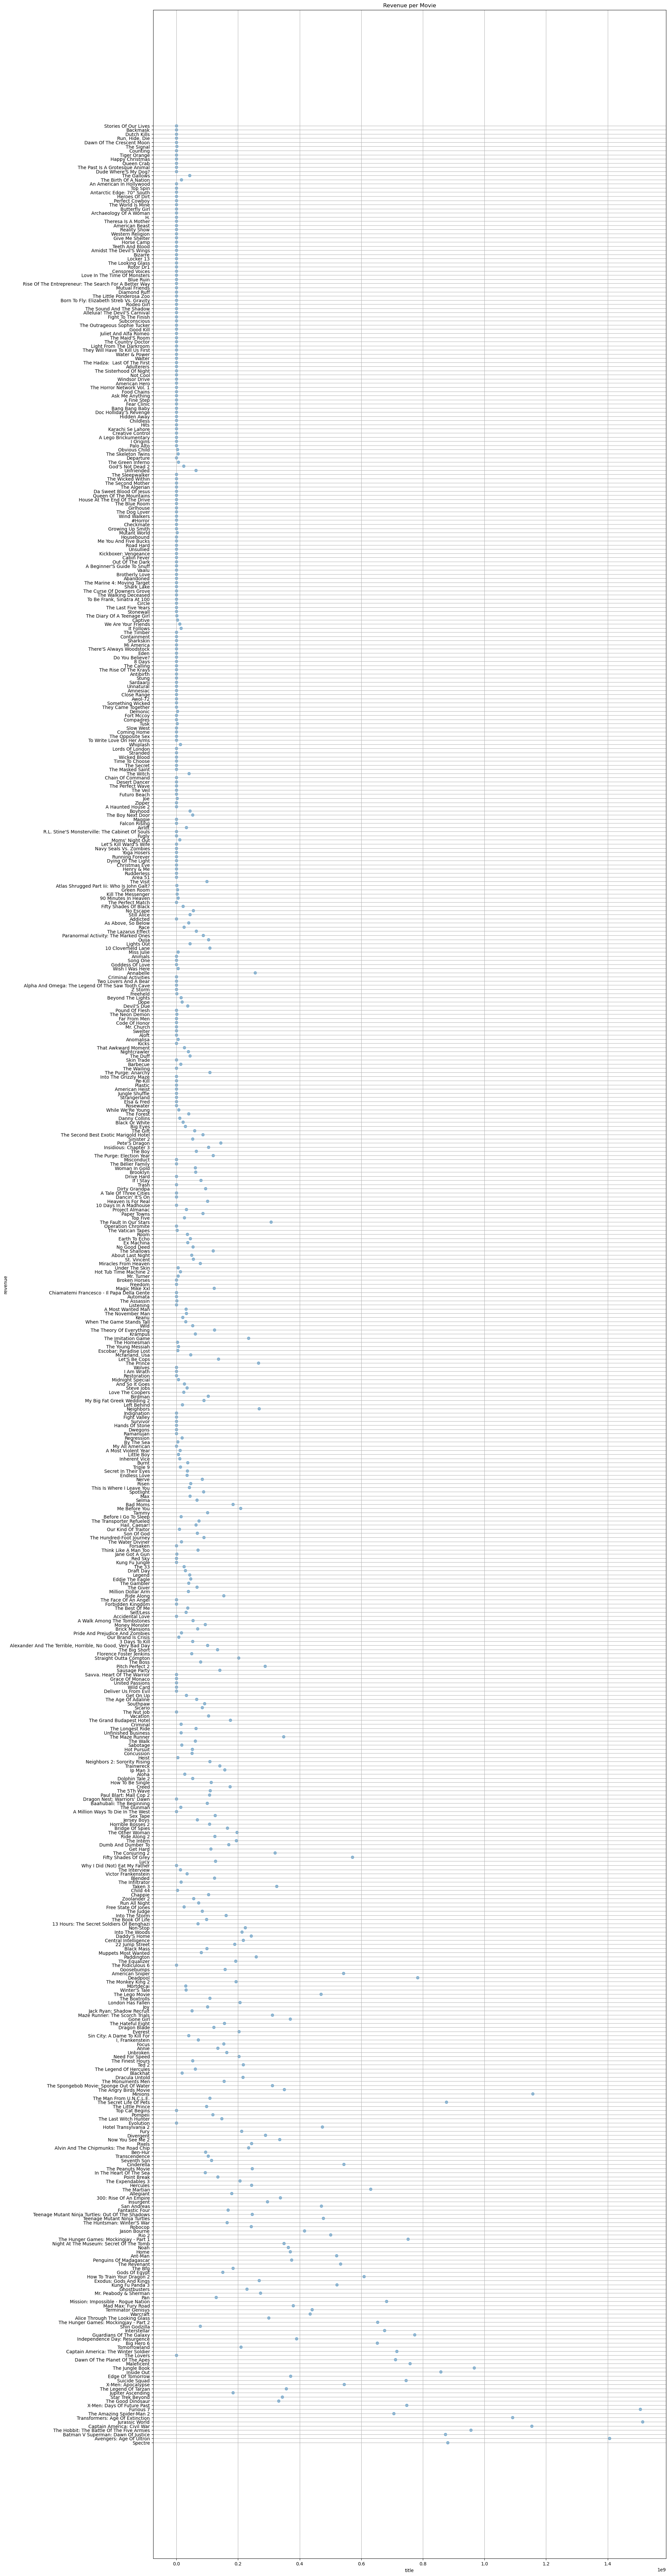

In [684]:
#Visual 1 - FILL IN
import matplotlib.pyplot as plt

plt.figure(figsize=(20,100))
plt.scatter(df3['revenue'], df3['title'], alpha=0.5)
plt.title('Revenue per Movie')
plt.xlabel('title')
plt.ylabel('revenue')
plt.grid(True)
plt.show()

*Answer to research question:* FILL IN

*Research question:*  How has action movies trended in terms of grossed revenue in the past 10 years (2014 and onward)?

In [685]:
df2['genres'] {'id': 28, 'name': 'Action'} 

SyntaxError: invalid syntax (3300321953.py, line 1)

In [645]:
import ast
#This will parse the 'genres' column to to convert into Python object.
df2['genres'] = df2['genres'].apply(lambda x: ast.literal_eval(x) if isinstance(x,str) else [])

#This filter rows where it goes through the Python dictionary and find the key 'name' and its value 'Action'.
action = df2[df2['genres'].apply(lambda genres: any(genre['name'] == 'Action' for genre in genres))]

In [686]:
action.head()

NameError: name 'action' is not defined

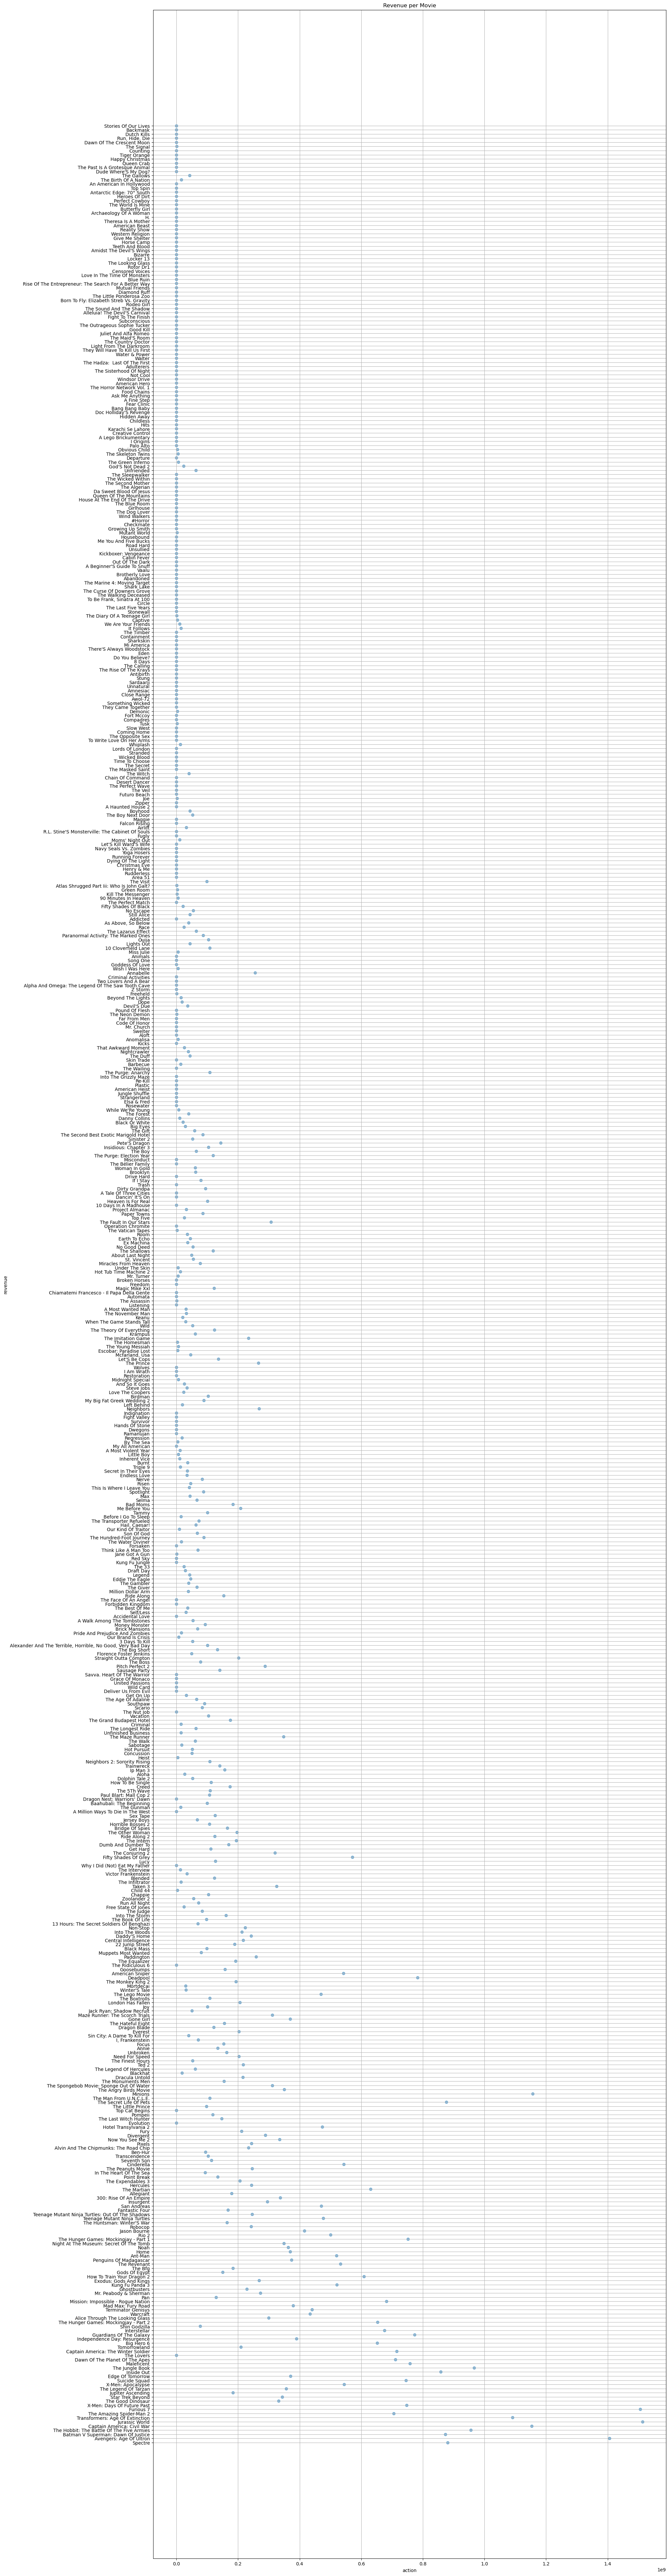

In [687]:
#Visual 2 - FILL IN

import matplotlib.pyplot as plt

plt.figure(figsize=(20,100))
plt.scatter(df3['revenue'], df3['title'], alpha=0.5)
plt.title('Revenue per Movie')
plt.xlabel('action')
plt.ylabel('revenue')
plt.grid(True)
plt.show()

*Answer to research question:* FILL IN

### **5.2:** Reflection
In 2-4 sentences, if you had more time to complete the project, what actions would you take? For example, which data quality and structural issues would you look into further, and what research questions would you further explore?

*Answer:* FILL IN